In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
from IPython.display import display

%matplotlib inline
plt.style.use('bmh')


In [111]:
def check_null(df):
    """
    Check null values in dataframe
    """
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    print("Total null values:", total.sum())
    print("Percent of null values:", (total.sum()/ df.count().sum())*100.round(3) , "%")
    print('null values and percentage in each column:')
    missing_data = pd.concat([total, percent], axis=1, keys=['NULL values', 'Percent'])
    display(missing_data.head(20))
    

def handle_missing_data(df):
    
    #  Dropping rows if all values in that row are missing. 
    df.dropna(how='all')

    # checking column if it has more than 60% missing values 
    df2 = df[[column for column in df if df[column].count() / len(df) >= 0.4]]
    # print(len(df2.columns))
    # print(len(df.columns))
    if len(df.columns) - len(df2.columns)  > 0:
        print("List of dropped columns with more than 60% missing values:", end=" ")
        for c in df.columns:
            if c not in df2.columns:
                print(c, end=", ")
        print('\n')
    # drop the column if it has more than 60% null values from the dataframe
    df.dropna(thresh=int(len(df)*0.4), axis=1, inplace=True)
    
    # we can drop of fill NAN values if we want to.
    # df.dropna(inplace=True)       
    # df.fillna(inplace=True)
    


In [112]:
def analyze(df):
    
    # histogram of numerical columns
    df_num = df.select_dtypes(include=['float64', 'int64'])
    df_num.hist(figsize=(10, 10), bins=50, xlabelsize=8, ylabelsize=8)
    plt.show()
    
    # for boolean data
    df_bool = df.select_dtypes(include=['bool'])
    for i in range(len(df_bool.columns)):
        sns.countplot(x=df_bool.columns[i], data=df_bool)
        plt.show()
        
    # for object columns
    # first check if the unique values are less than 10
    # if yes then we can visualize as categorical variables
    df_obj = df.select_dtypes(include=['object'])
    for i in range(len(df_obj.columns)):
        unique_values = int(df_obj.iloc[:, i].nunique())
        print(unique_values)
        if unique_values < 10:
            sns.countplot(x=df_obj.columns[i], data=df_obj)
            plt.show()
        
    
    # boxplot of columns
    i = int(np.ceil(np.sqrt(len(df.columns))))
    print(i)
    df.plot(kind='box', subplots=True, layout=(i,i), sharex=False, sharey=False , figsize=(20, 20))
    plt.show()
    
    # heatmap
    plt.figure(figsize=(20, 20))
    sns.heatmap(df.corr(), annot=True, linewidths=0.5,  annot_kws={'size': 20}, cmap='viridis' , center = 0 )
    plt.show()
    
    # ploting highly correlated features if exists
    corr = df.corr()
    # print(corr)
    for i in corr.columns:
        for j in corr.columns:
            correlation = abs(corr[i][j])
            if correlation > 0.5 and i != j:
                print(f'{i} and {j} are highly correlated\n coorelation = {correlation}')
                plt.figure
                sns.pairplot(data=df,
                            x_vars=i,
                             y_vars=j, height=10)
                plt.show()
            if i == j :
                break;
            
            
    

In [113]:
# a function that performs automatic EDA on a file it can either be csv or xlsx
def auto_eda(in_path):
    if os.path.isfile(in_path):
        print(f'analyzing {in_path}')
        
        file_type = in_path.split('.')[-1]
        if file_type == 'csv':
            df = pd.read_csv(in_path)
        elif file_type == 'xlsx':
            df = pd.read_excel(in_path)
        else:
            print('File type not supported')
            return
    else:
        print(f'analyzing folder {in_path}')
        [auto_eda(os.path.join(in_path , i)) for i in os.listdir(in_path)]
        return


    display(df.head())
    # print the columns of the dataframe
    print(df.columns)

    # print the info of the dataframe
    print(df.info())

    # print the describe of the dataframe
    display(df.describe())
    
    # check for null values
    check_null(df)
    
    # handling missing data with fillna
    # print(df.info())
    print(f'shape before handling missing data: {df.shape}')
    handle_missing_data(df)
    print(f'shape after handling missing data: {df.shape}')

    # analyzing data for visualizations
    analyze(df)
    
    print(f'end of analysis of {in_path}')


In [114]:
os.listdir('.')


['.git',
 '.ipynb_checkpoints',
 'Data Police shootings',
 'EDA.ipynb',
 'Retail Data Analytics']

analyzing folder .\data police shootings
analyzing .\data police shootings\fatal-police-shootings-data.csv


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5416 entries, 0 to 5415
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5416 non-null   int64  
 1   name                     5416 non-null   object 
 2   date                     5416 non-null   object 
 3   manner_of_death          5416 non-null   object 
 4   armed                    5189 non-null   object 
 5   age                      5181 non-null   float64
 6   gender                   5414 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     5416 non-null   object 
 9   state                    5416 non-null   object 
 10  signs_of_mental_illness  5416 non-null

,id,age
count,5416.000000,5181.000000
mean,3010.398264,37.117931
std,1695.786456,13.116135
min,3.000000,6.000000
25%,1545.750000,27.000000
50%,3009.500000,35.000000
75%,4486.250000,46.000000
max,5927.000000,91.000000


Total null values: 1234
Percent of null values: 0.016543772623676095 %
null values and percentage in each column:


,NULL values,Percent
race,521,0.096196
flee,249,0.045975
age,235,0.043390
armed,227,0.041913
gender,2,0.000369
id,0,0.000000
name,0,0.000000
date,0,0.000000
manner_of_death,0,0.000000
city,0,0.000000


shape before handling missing data: (5416, 14)
shape after handling missing data: (5416, 14)


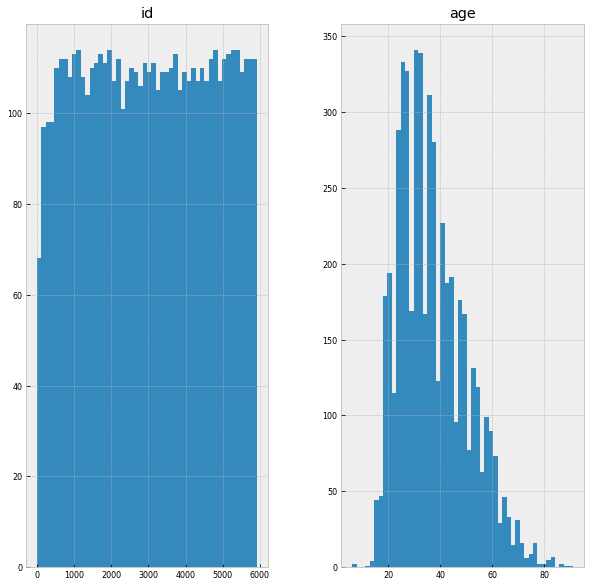

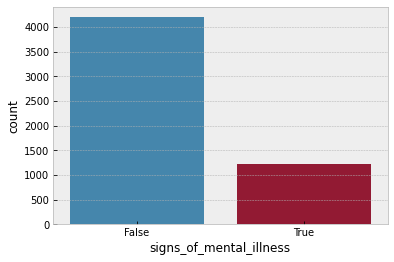

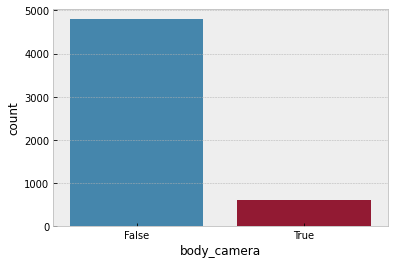

5206
1844
2


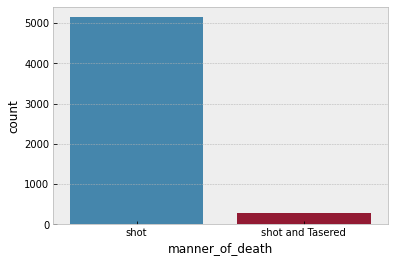

93
2


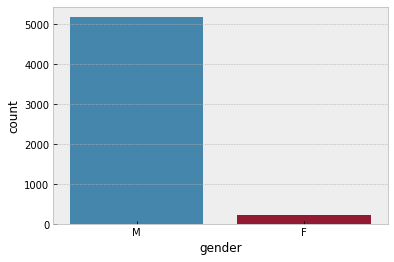

6


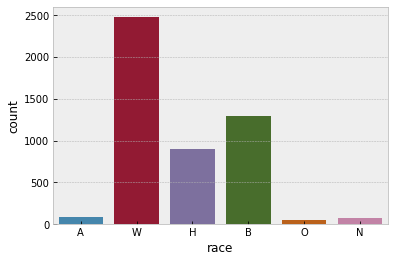

2470
51
3


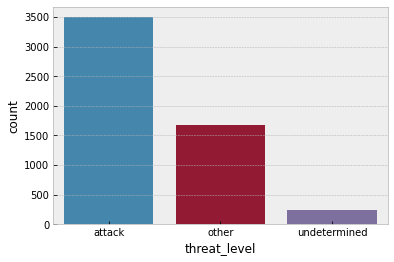

4


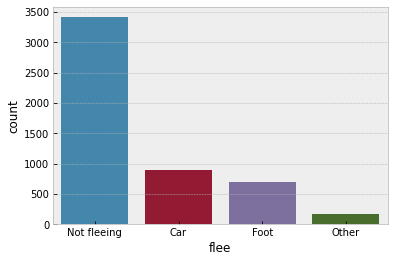

4


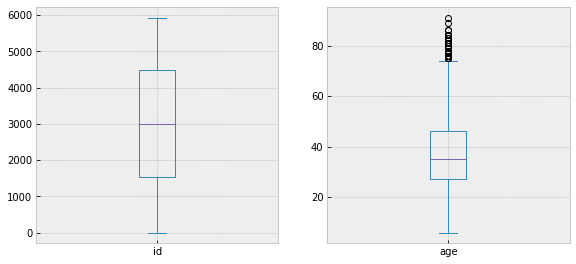

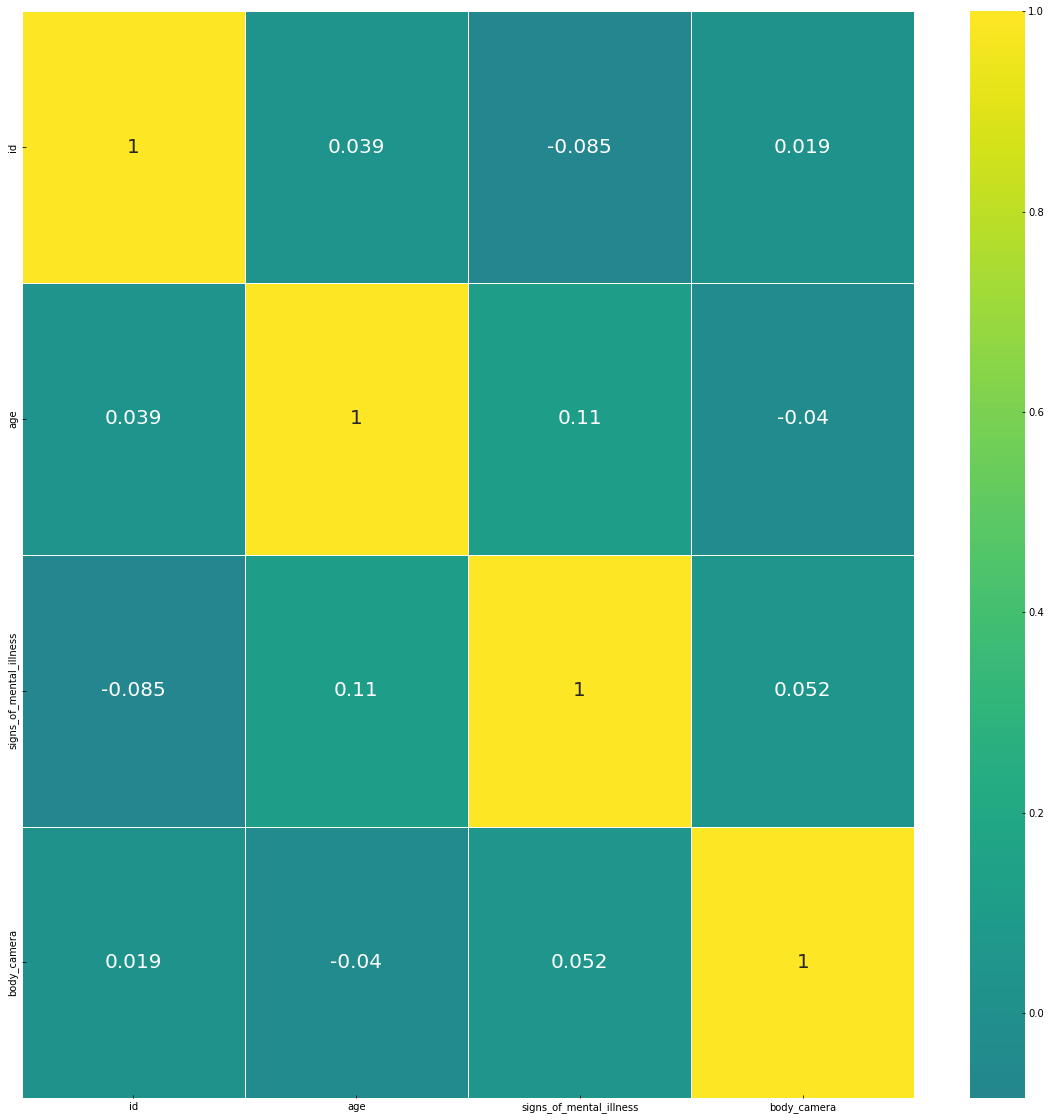

end of analysis of .\data police shootings\fatal-police-shootings-data.csv


In [115]:
# test the function 
# we can pass the path of the file or folder to the function
auto_eda('.\\data police shootings')



analyzing folder .\Retail Data Analytics
analyzing .\Retail Data Analytics\Features data set.csv


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB
None


,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


Total null values: 24040
Percent of null values: 0.3238146551724138 %
null values and percentage in each column:


,NULL values,Percent
MarkDown2,5269,0.643346
MarkDown4,4726,0.577045
MarkDown3,4577,0.558852
MarkDown1,4158,0.507692
MarkDown5,4140,0.505495
CPI,585,0.071429
Unemployment,585,0.071429
Store,0,0.000000
Date,0,0.000000
Temperature,0,0.000000


shape before handling missing data: (8190, 12)
List of dropped columns with more than 60% missing values: MarkDown2, 

shape after handling missing data: (8190, 11)


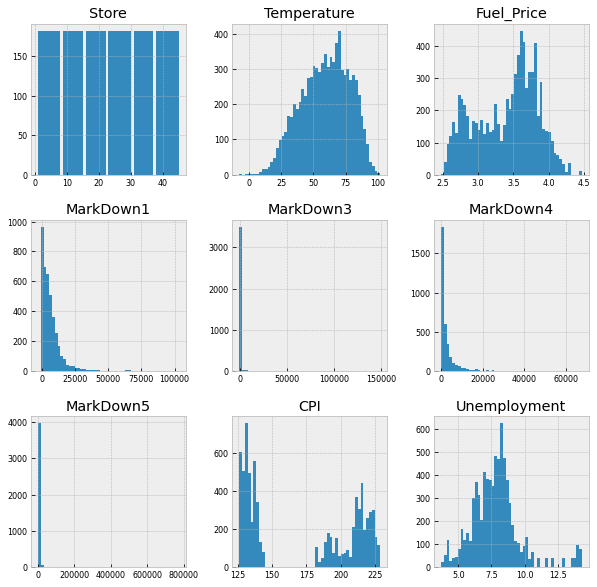

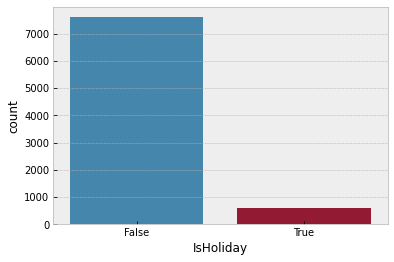

182
4


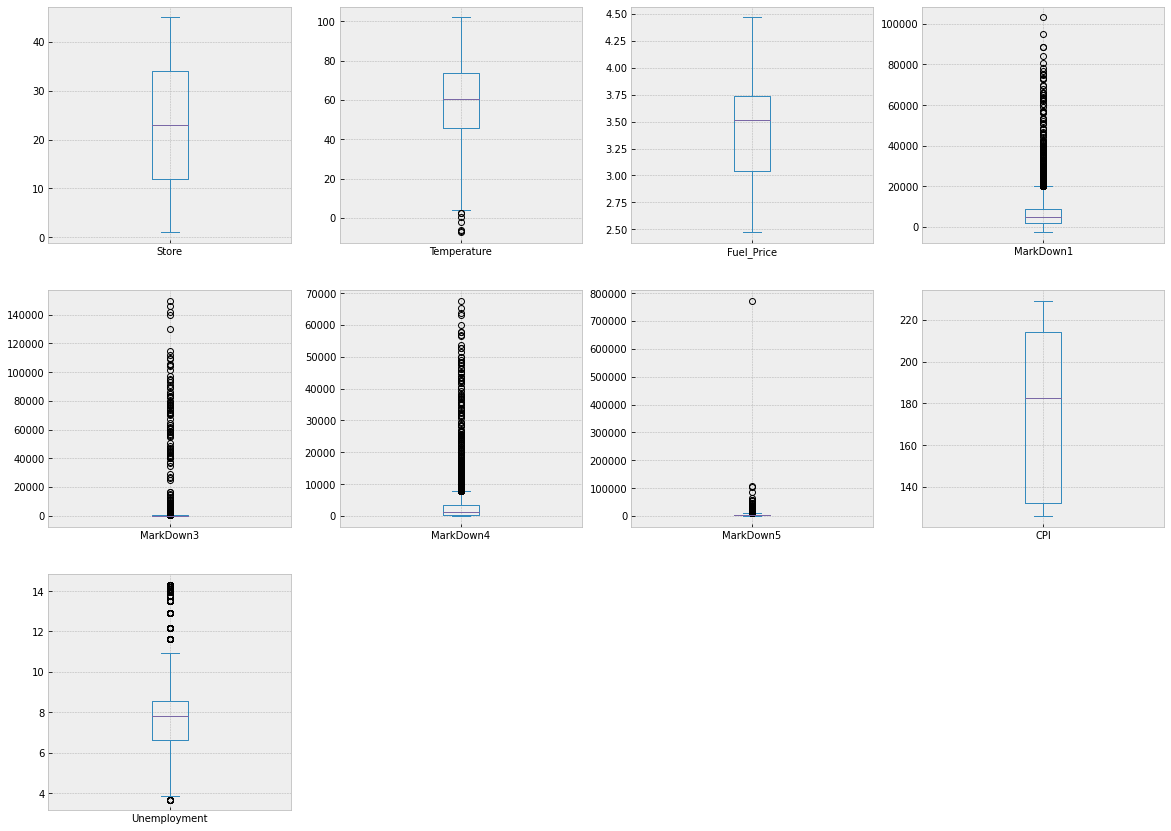

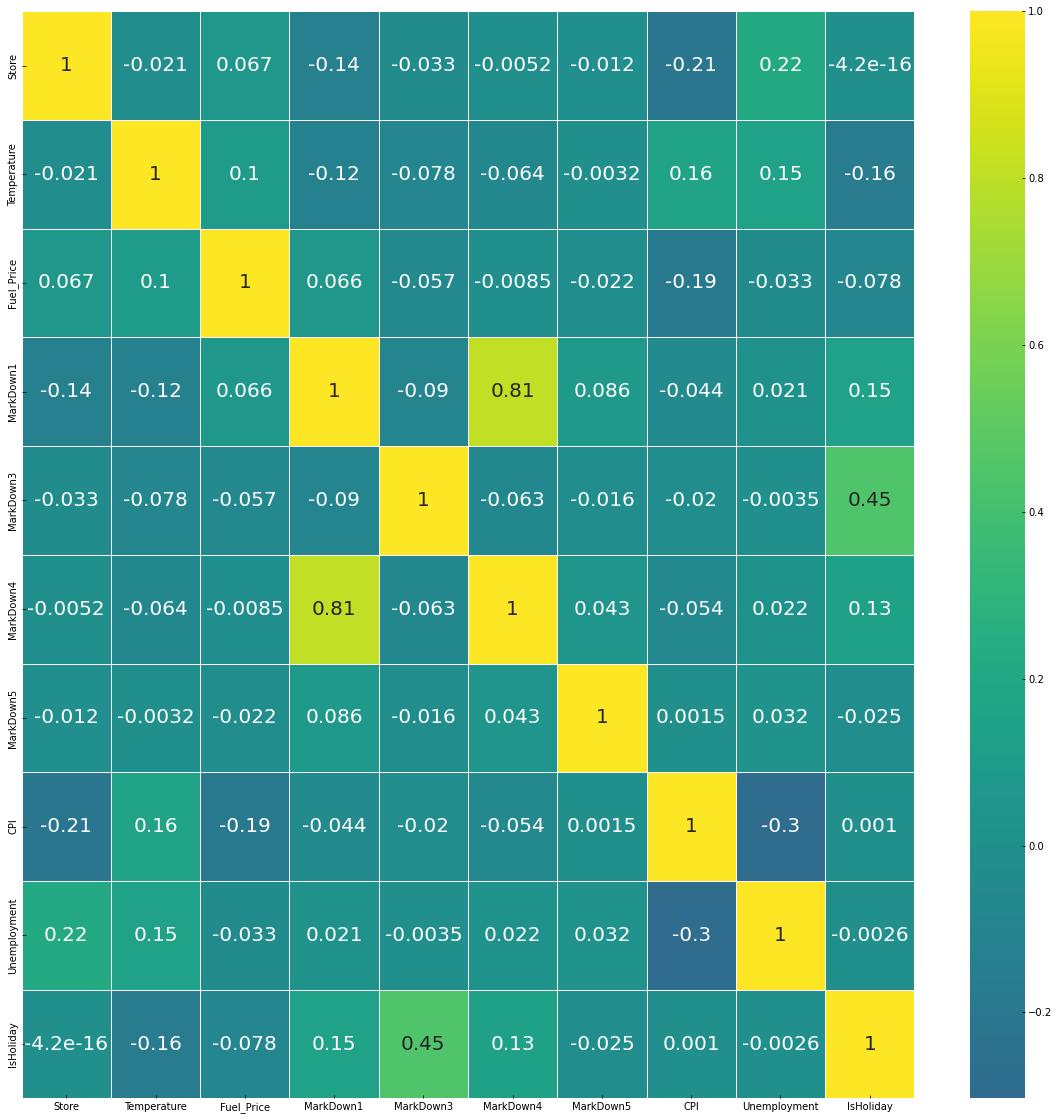

MarkDown4 and MarkDown1 are highly correlated
 coorelation = 0.8104553749412023


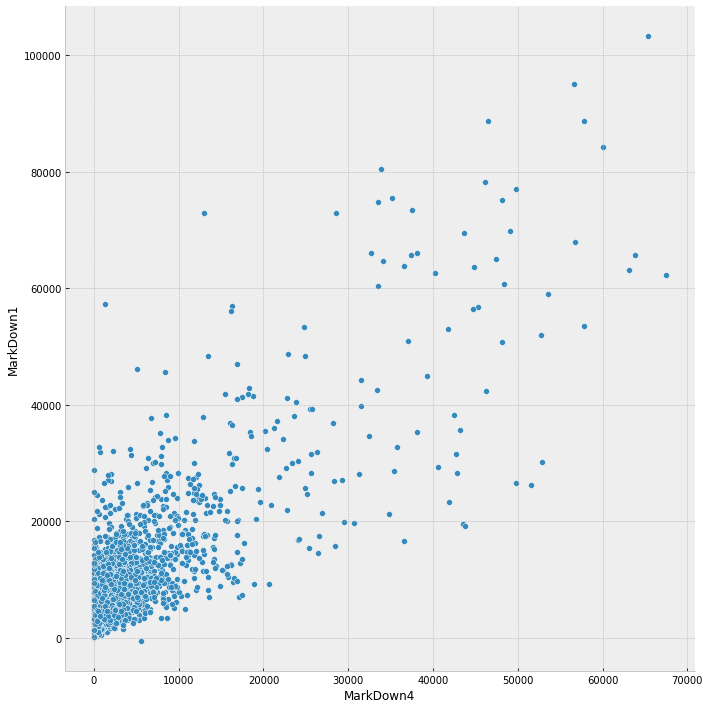

end of analysis of .\Retail Data Analytics\Features data set.csv
analyzing .\Retail Data Analytics\sales data-set.csv


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
None


,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


Total null values: 0
Percent of null values: 0.0 %
null values and percentage in each column:


,NULL values,Percent
Store,0,0.0
Dept,0,0.0
Date,0,0.0
Weekly_Sales,0,0.0
IsHoliday,0,0.0


shape before handling missing data: (421570, 5)
shape after handling missing data: (421570, 5)


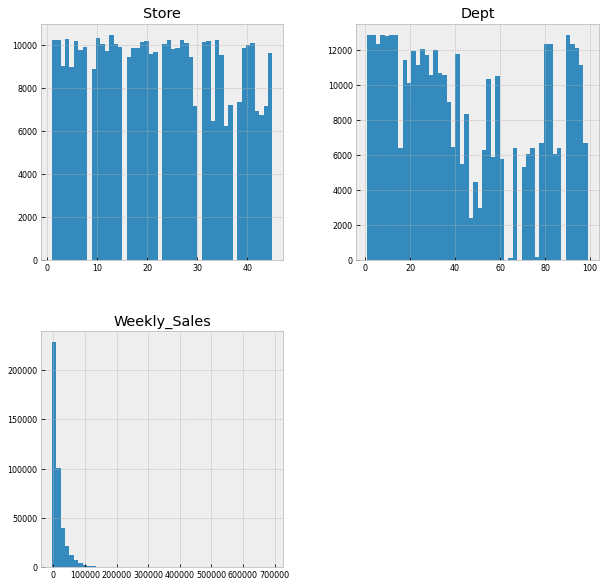

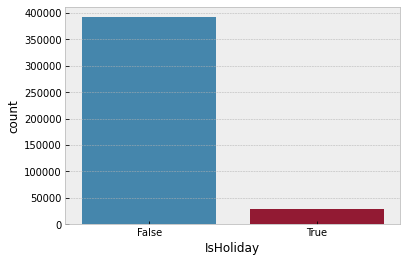

143
3


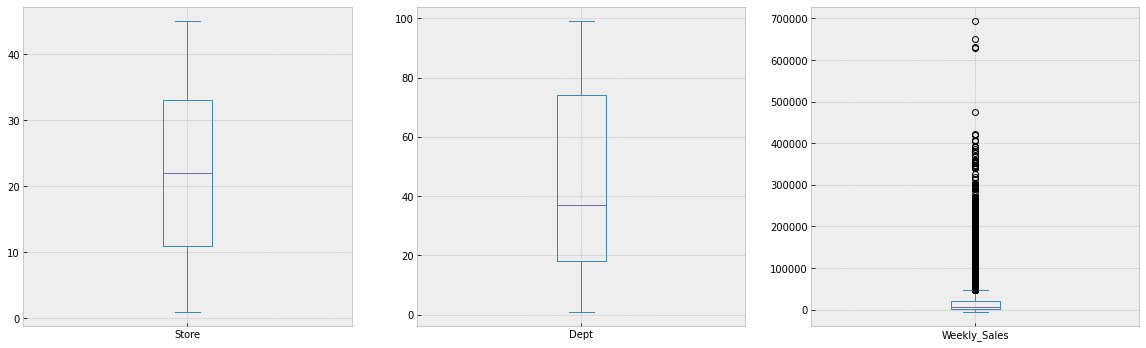

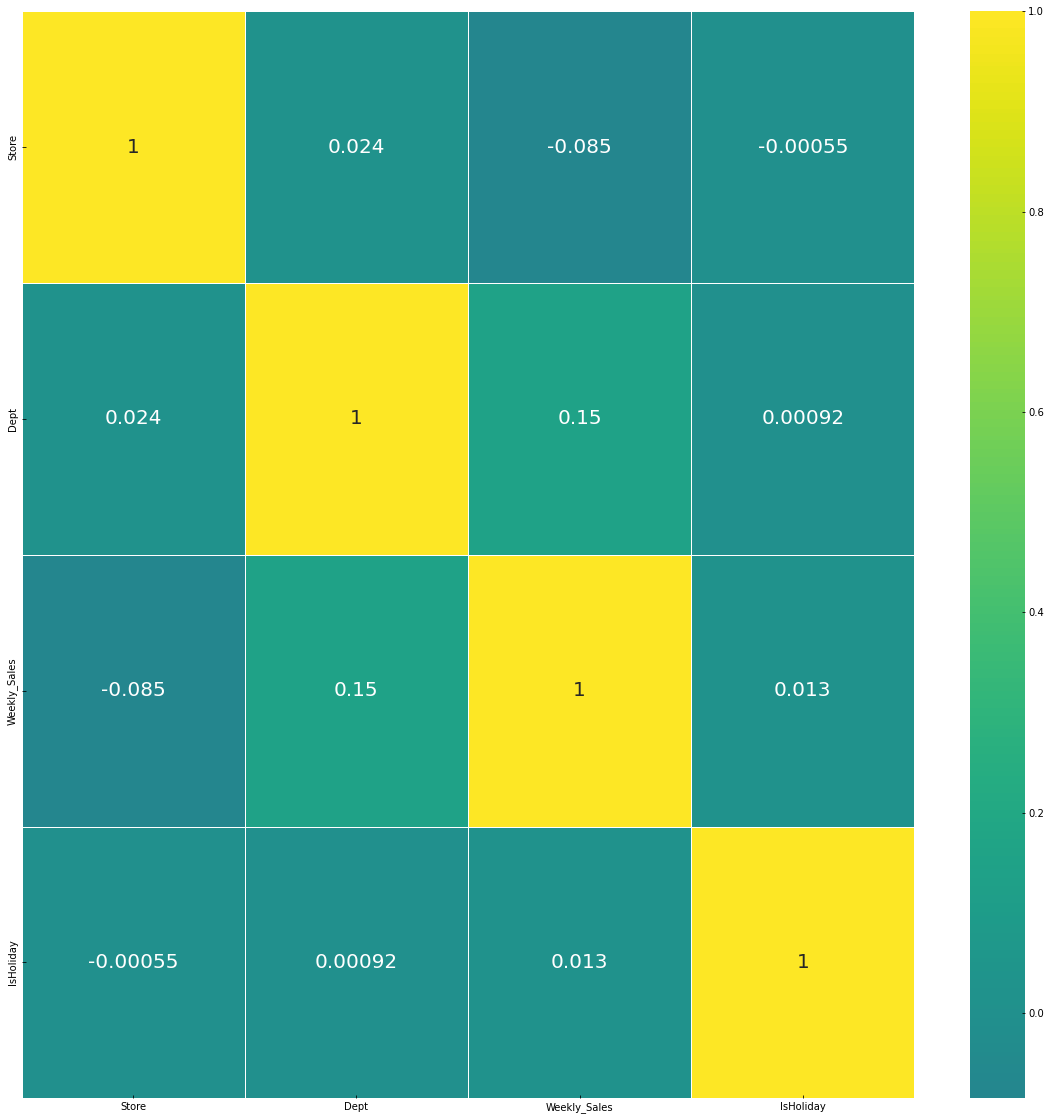

end of analysis of .\Retail Data Analytics\sales data-set.csv
analyzing .\Retail Data Analytics\stores data-set.csv


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


Index(['Store', 'Type', 'Size'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB
None


,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


Total null values: 0
Percent of null values: 0.0 %
null values and percentage in each column:


,NULL values,Percent
Store,0,0.0
Type,0,0.0
Size,0,0.0


shape before handling missing data: (45, 3)
shape after handling missing data: (45, 3)


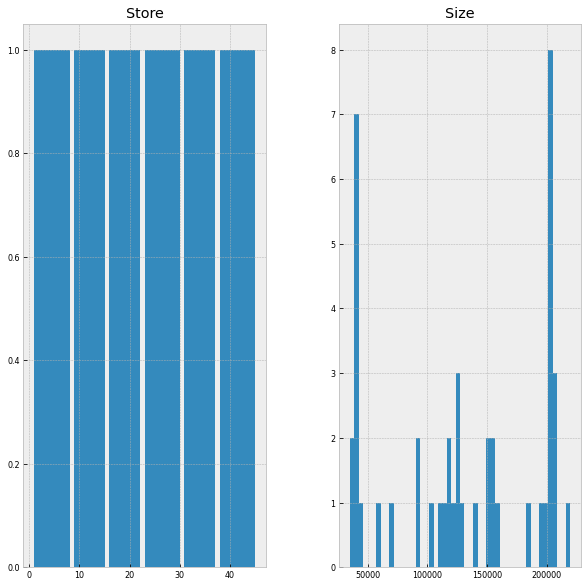

3


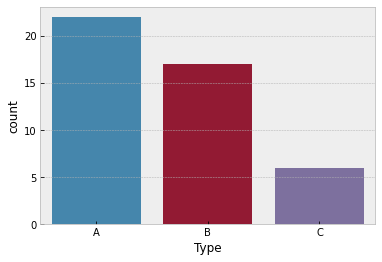

2


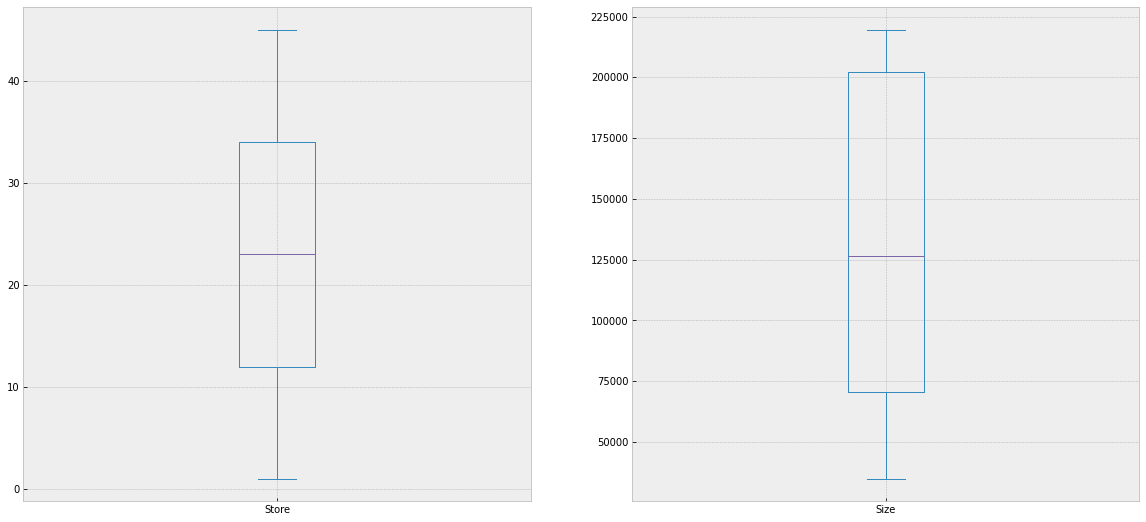

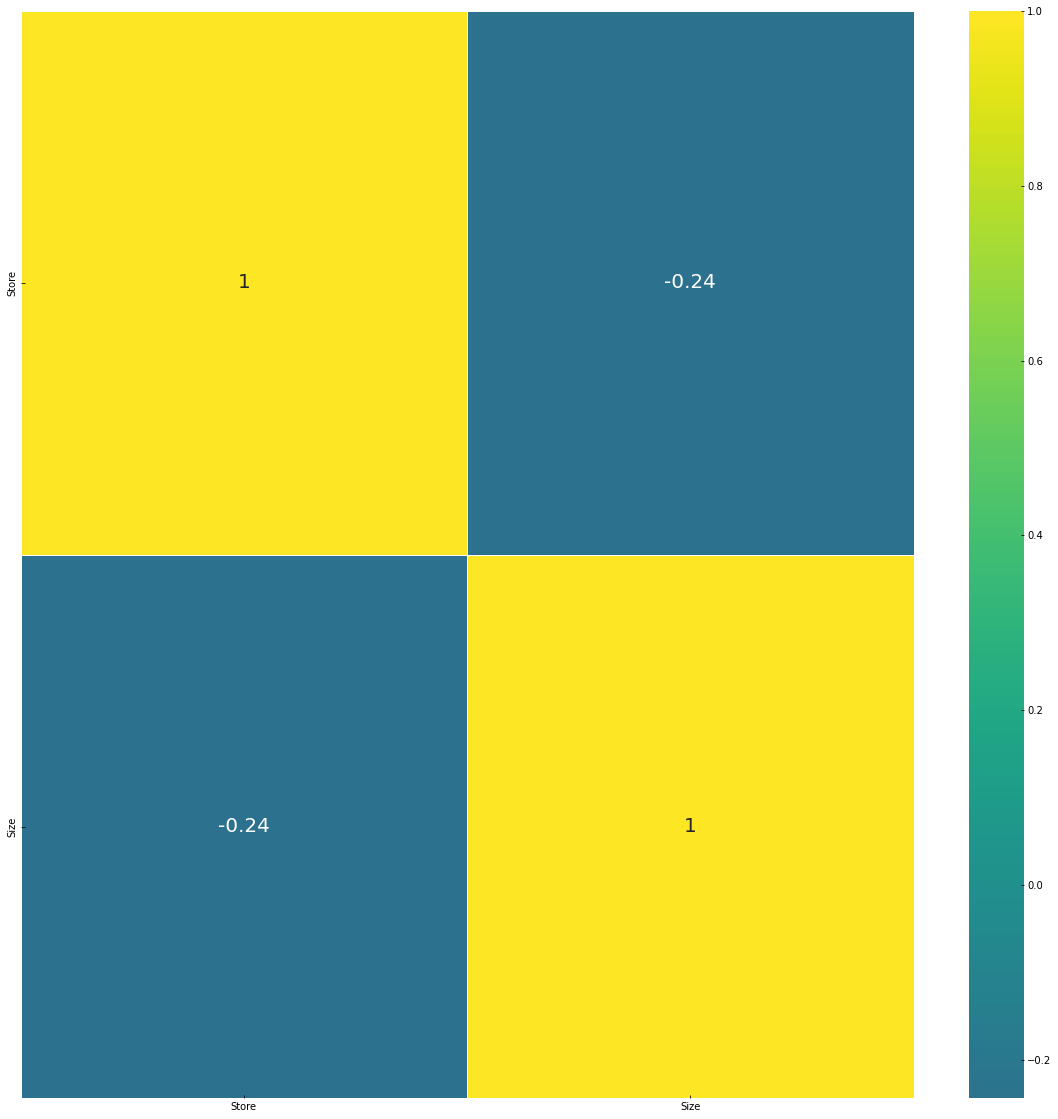

end of analysis of .\Retail Data Analytics\stores data-set.csv


In [116]:
# auto_eda('.\\Retail Data Analytics\\Features data set.csv')
auto_eda('.\\Retail Data Analytics')
# 